In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import os
# os.chdir("drive/My Drive/ML Data")
!pip install warning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning


In [3]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/ML Data/adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#Let's import all the necessary pacakages
import numpy as np 


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier



# Data Ingestion

In [5]:
data.shape

(32561, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Checking how many classes in income features

In [7]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Encoding Class in Income to 0 or 1

In [8]:
data['income'] = data['income'].map({'<=50K':0,'>50K':1}
                                )
data['income'].unique()

array([0, 1])

Check Special Symbols in Data


In [9]:
data[data['workclass'] == "?"][:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,0
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,0


Replace Special Symbols with np.nan

In [10]:
data.replace('?',np.NAN,inplace=True)

Check the Null Values

In [11]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

#Note:
- If the feature is categorical feature, we have to use bfill
- bfill replace NAN with forward & backward values


In [12]:
#Replacing NAN with forward & Backward fill
data['workclass'] = data['workclass'].fillna(method = 'bfill')
data['occupation']= data['occupation'].fillna(method = 'ffill')
data['native.country'] = data['native.country'].fillna(method='pad')

Checking if null value exists again after the filling


In [13]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        1
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#Replacing Columns name

In [14]:
data.rename(columns={
    'education.num' : 'education_num',
    'marital.status' : 'marital_status',
    'capital.gain' : 'capital_gain',
    'capital.loss' : 'capital_loss',
    'hours.per.week' : 'hours_per_week',
    'native.country' : 'native_country'

},inplace=True)
# data = pd.DataFrame(data)

In [15]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


#Now, let's seperate Categorical & Numerical Features

In [16]:
categorical_features = [col for col in data.columns if data[col].dtype == object]
numerical_features = [col for col in data.columns if data[col].dtype != object]

In [17]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [18]:
numerical_features


['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

Univariate Analysis

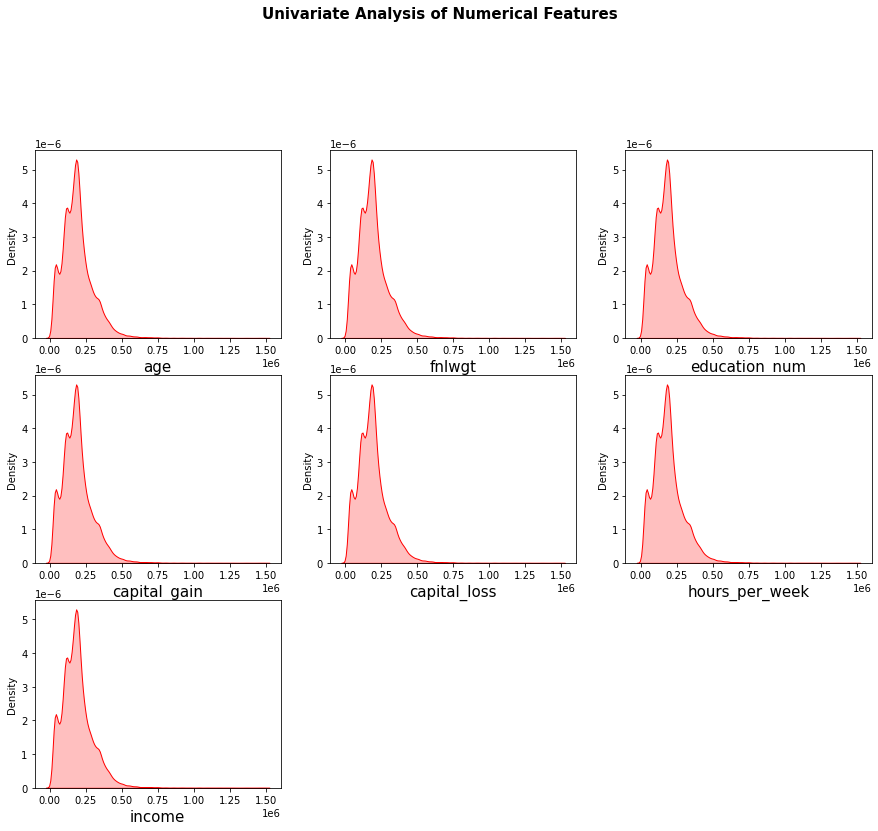

In [19]:
plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontweight= 'bold', fontsize = 15)

for i in range(0, len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x=data[numerical_features[1]],shade=True,color='r',data=data)
  plt.xlabel(numerical_features[i],fontsize=15)
  # plt.tight_layout()

1) Age is normally distributed
2) Final weight, Capital loss & Capital Gain are heavily right skewed.

#Bivariate Analysis

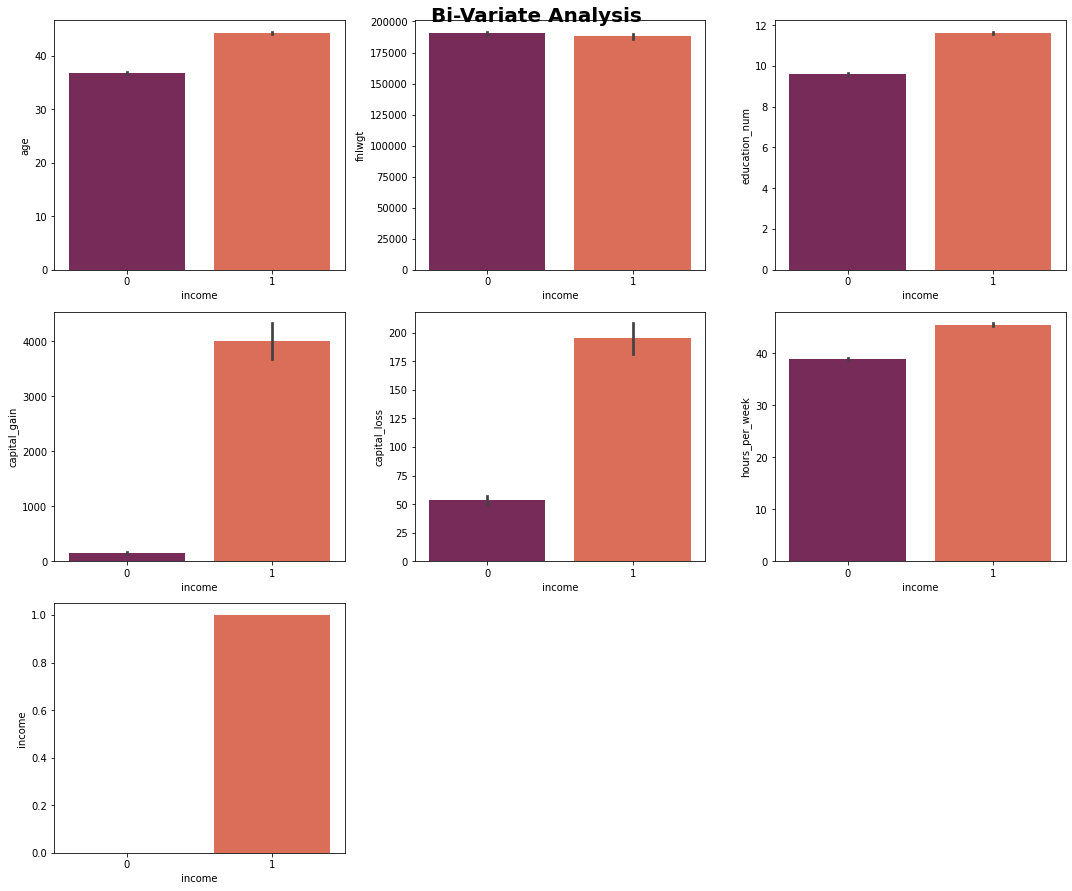

In [20]:
plt.figure(figsize=(15,20))

plt.suptitle('Bi-Variate Analysis',fontsize=20, fontweight = 'bold', alpha=1, y=1)

for i in range(0,len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.barplot(y=numerical_features[i], x='income',data=data,palette='rocket')
  plt.tight_layout()

#Checking Distrubution & Outliers Together

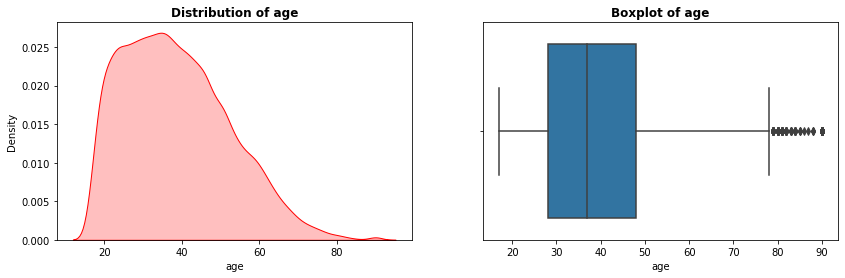

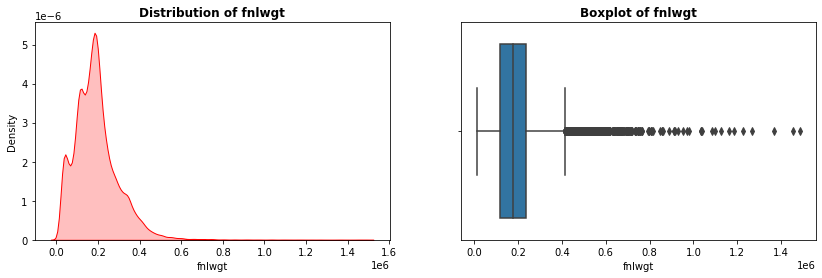

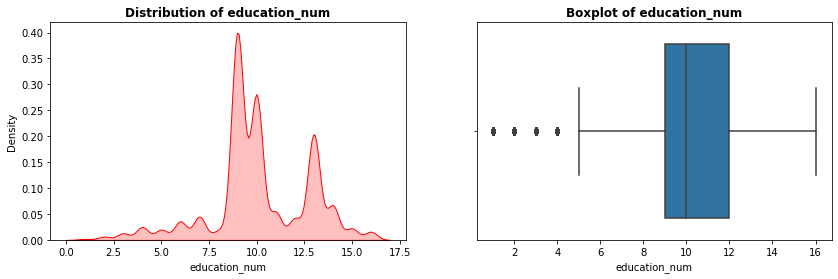

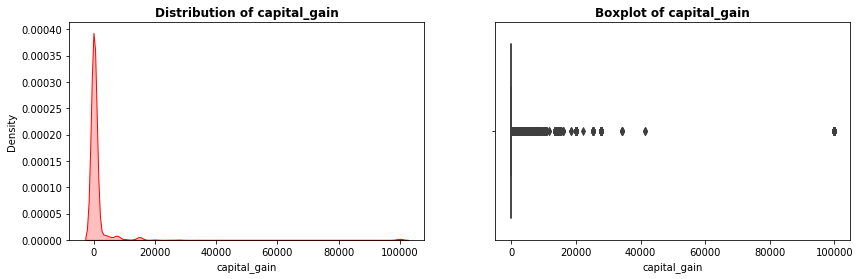

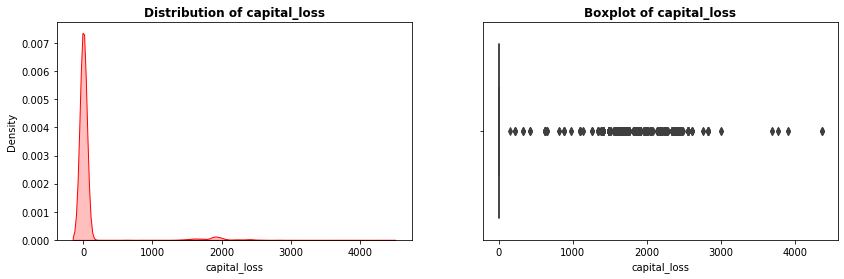

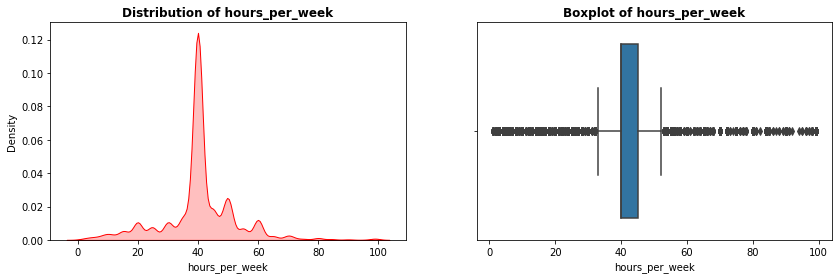

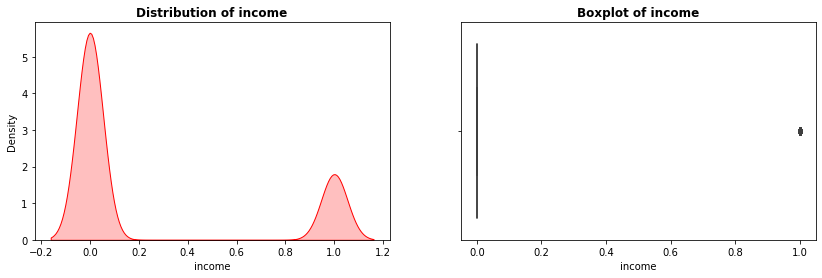

In [21]:
for features in numerical_features:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(x=data[features], shade=True, color='r',data=data)
  plt.title("Distribution of {}".format(features), fontweight='bold')
  

  plt.subplot(122)
  sns.boxplot(x= features, data=data[numerical_features])
  plt.title('Boxplot of {}'.format(features),fontweight='bold')
  plt.show()

#Handling the outliers

In [22]:
#handling the outliers (Imputation)
data1 = data.copy()

features_to_use = ['fnlwgt','age','hours_per_week']


for i in range(len(features_to_use)):
  q1=data1[features_to_use[i]].quantile(0.25)

  q3=data1[features_to_use[i]].quantile(0.75)

  IQR=q3-q1

  upper_limit = data1[features_to_use[i]].quantile(0.75) + (1.5 * IQR)

  lower_limit = data1[features_to_use[i]].quantile(0.25) - (1.5 * IQR)

  data1[features_to_use[i]] = np.where(data1[features_to_use[i]] > upper_limit,

    upper_limit,

    np.where(

        data1[features_to_use[i]] < lower_limit,

        lower_limit,

        data1[features_to_use[i]]

        )

    )







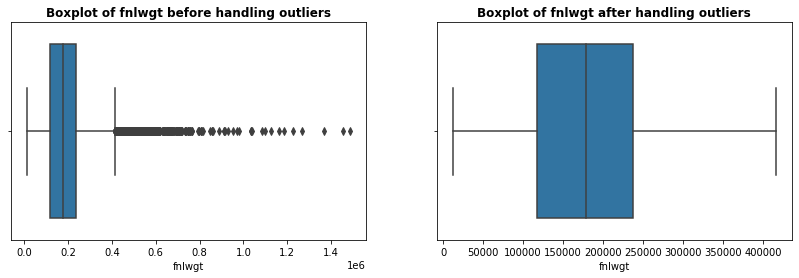

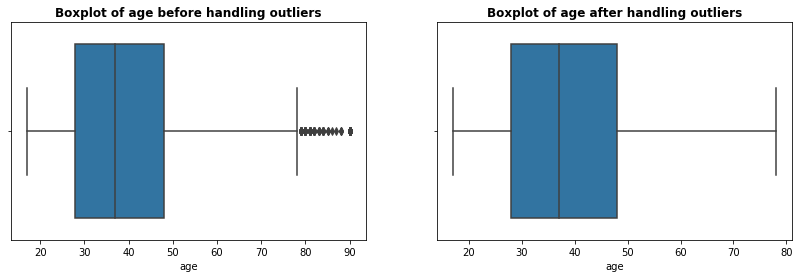

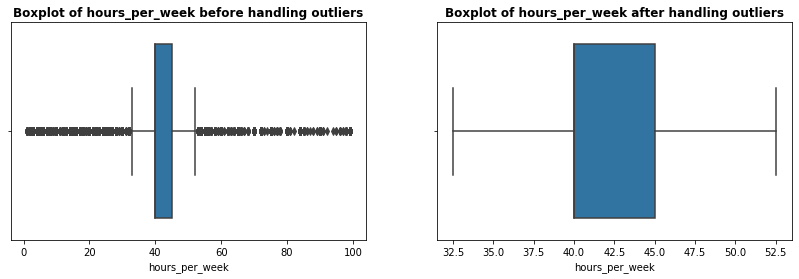

In [23]:
for fea in features_to_use:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.boxplot(x=fea, data=data)
  plt.title('Boxplot of {} before handling outliers'.format(fea),fontweight='bold')

  plt.subplot(122)
  sns.boxplot(x=fea, data=data1)
  plt.title('Boxplot of {} after handling outliers'.format(fea),fontweight='bold')
  plt.show()

Seperate Independent and Dependent 

In [24]:
x = data1.iloc[:,:-1]
y = data1['income']

In [25]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,Private,77053.0,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40.0,United-States
1,78.0,Private,132870.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States
2,66.0,Private,186061.0,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40.0,United-States
3,54.0,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States
4,41.0,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Label Encoding on the categorical features

- If the data of a feature is continous or discrete (numbers) then we donot have to do anything and we can directly standardizes and train the model.

- But when the data is categorical(string) then we have to perfrom encoding , it means convert it to 0 or 1, the only we can train the model.

In [27]:
from sklearn.preprocessing import LabelEncoder

labelencoder_x = LabelEncoder()

In [28]:
x[categorical_features] = x[categorical_features].apply(LabelEncoder().fit_transform)

In [29]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,3,77053.0,11,9,6,14,1,4,0,0,4356,40.0,38
1,78.0,3,132870.0,11,9,6,3,1,4,0,0,4356,32.5,38
2,66.0,3,186061.0,15,10,6,3,4,2,0,0,4356,40.0,38
3,54.0,3,140359.0,5,4,0,6,4,4,0,0,3900,40.0,38
4,41.0,3,264663.0,15,10,5,9,3,4,0,0,3900,40.0,38


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [32]:
x_train.shape, y_train.shape

((21815, 14), (21815,))

In [33]:
x_test.shape, y_test.shape

((10746, 14), (10746,))

In [34]:
report = []

#Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [37]:
model.score(x_test, y_test)

0.8120230783547366

In [38]:
d_pred = model.predict(x_test)


In [39]:
from sklearn.metrics import accuracy_score 

d_acc = accuracy_score(y_test, d_pred) 
report.append(['Decision Tree',d_acc])
d_acc

0.8120230783547366

# Hyper Paramter Tuning of decision Tree

In [40]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter':['best','random']
}

In [41]:
dt_grid = GridSearchCV(estimator=model, param_grid= grid_param, cv=3, n_jobs= -1)

In [42]:
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [43]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [44]:
dt_best_pra = DecisionTreeClassifier(criterion= 'gini',max_depth = 8, min_samples_leaf=9,min_samples_split = 2, splitter='best')

In [45]:
dt_best_pra.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=9)

In [46]:
dt_best_para_pred2 = dt_best_pra.predict(x_test)

In [47]:
print('Accuracy Before Hyper-Parameter Tuning:',accuracy_score(y_test,d_pred))
print('Accuracy after Hyper-Paramter Tuning', accuracy_score(y_test, dt_best_para_pred2))

Accuracy Before Hyper-Parameter Tuning: 0.8120230783547366
Accuracy after Hyper-Paramter Tuning 0.853713009491904


In [48]:
hd_acc = accuracy_score(y_test, dt_best_para_pred2)

report.append(['Decision Tree Hyperparameter tuneed', hd_acc])

#Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [50]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred_rf =  rf_model.predict(x_test)

In [52]:
#before hyper-parameter tuning
rf_acc = accuracy_score(y_test, y_pred_rf)

report.append(['Random Forest', rf_acc])

accuracy_score(y_test, y_pred_rf)

0.8545505304299275

In [53]:
grid_param = {
    'n_estimators': [90,100],
    'criterion' : ['gini','entropy'],
    'max_depth':range(2,12,1),
    'min_samples_leaf': range(1,5,1),
    'max_features': ['auto','log2']
    }

In [54]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid= grid_param, cv=3, n_jobs= -1)

In [55]:
rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 12),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': [90, 100]})

In [56]:
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 90}

In [57]:
rf_model_best_pra = RandomForestClassifier(criterion= 'gini',max_depth = 11, min_samples_leaf=1,max_features='log2', n_estimators= 90)

In [58]:
rf_model_best_pra.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=90)

In [59]:
y_pred_rf_bestpra = rf_model_best_pra.predict(x_test)


In [60]:
rfh_score = accuracy_score(y_test, y_pred_rf_bestpra)
report.append(['Random Forest Classifier',rfh_score])
accuracy_score(y_test, y_pred_rf_bestpra)

0.861715987344128

#Bagging Classifier Using SVC

In [61]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [62]:
model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

In [63]:
model_bag_svc.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

In [64]:
y_pred_bag = model_bag_svc.predict(x_test)

In [65]:
bg_acc = accuracy_score(y_test,y_pred_bag)

report.append(['bagging Classifier Using SVC',bg_acc])

accuracy_score(y_test, y_pred_bag)

0.7949934859482598

In [66]:
#Voting Classifier


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


clf1 = LogisticRegression(multi_class='multinomial',random_state=1)

clf2 = RandomForestClassifier(n_estimators= 50, random_state=1)

clf3 = GaussianNB()


eclf1 = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb', clf3)], voting = 'hard')

In [67]:
eclf1.fit(x_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())])

In [68]:
y_pred_voting = eclf1.predict(x_test)

In [69]:
vc_acc = accuracy_score(y_test, y_pred_voting)

report.append(['Voting Classifier', vc_acc])

accuracy_score(y_test, y_pred_voting)

0.8104410943606923

Extra Tree Classifier

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier()

In [71]:
et_model.fit(x_train, y_train)

ExtraTreesClassifier()

In [72]:
y_pred_et = et_model.predict(x_test)

In [73]:
et_acc = accuracy_score(y_test, y_pred_et)

report.append(['Extra Trees Classifier',et_acc])

accuracy_score(y_test, y_pred_et)

0.8416154848315652

#Hyper parameter Tuning

In [81]:
grid_param = {
    'n_estimators': [90,100],
    'criterion' : ['gini','entropy'],
    'max_depth':range(2,12,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['sqrt','log2']
    }

In [82]:
grid_search_bestpara = GridSearchCV(estimator=et_model, param_grid= grid_param, cv=3, n_jobs= -1)

In [77]:
grid_search_bestpara.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [87]:
et_best_para = ExtraTreesClassifier(criterion='gini', max_depth =11, max_features = 'sqrt',min_samples_leaf=1, min_samples_split=5, n_estimators=5)

In [88]:
et_best_para.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=11, max_features='sqrt', min_samples_split=5,
                     n_estimators=5)

In [89]:
y_pred_et = et_best_para.predict(x_test)

In [91]:
et_ac_ht = accuracy_score(y_test, y_pred_et)

report.append(['Extra Trees Classifier',et_ac_ht])

accuracy_score(y_test, y_pred_et)

0.8429182951796017

In [92]:
report

[['Decision Tree', 0.8120230783547366],
 ['Decision Tree Hyperparameter tuneed', 0.853713009491904],
 ['Random Forest', 0.8545505304299275],
 ['Random Forest Classifier', 0.861715987344128],
 ['bagging Classifier Using SVC', 0.7949934859482598],
 ['Voting Classifier', 0.8104410943606923],
 ['Extra Trees Classifier', 0.8416154848315652],
 ['Extra Trees Classifier', 0.8429182951796017]]

In [93]:
i_report = pd.DataFrame(report, columns=['Classifier','Accuracy'])

In [94]:
i_report.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
3,Random Forest Classifier,0.861716
2,Random Forest,0.854551
1,Decision Tree Hyperparameter tuneed,0.853713
7,Extra Trees Classifier,0.842918
6,Extra Trees Classifier,0.841615
0,Decision Tree,0.812023
5,Voting Classifier,0.810441
4,bagging Classifier Using SVC,0.794993


#Summary

Random Forest with hyperparamter tunning gives the best accuracy.

In [ ]:
import pickle

pickle.dump(rf_model, open('radomForest_hypertuned.sav','wb'))